### PRÉ-PROCESSAMENTO DOS DADOS

In [26]:
import numpy as np
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.utils import dropna
from ta.momentum import roc, rsi, williams_r, StochRSIIndicator
from ta.trend import ema_indicator, macd, macd_diff, macd_signal
from ta.volume import on_balance_volume
import os

### DEFINIÇÃO DE VARIÁVEIS

In [27]:
# base dir
BASE_DIR = os.path.dirname(os.path.abspath('__file__'))
DATA_DIR = os.path.join(BASE_DIR, 'data')
# dias para predicao
DIAS = 30
test_size = 0.2

# papel
papel = 'ABVE3'

# lendo dataset
df = pd.read_csv(os.path.join(DATA_DIR, 'abev3.csv'))
df = df.iloc[:, 1:]
print(df.head())

         date   open   high    low    volume  adj_close  close
0  2023-02-14  13.15  13.36  12.99  29701200  13.000000   13.0
1  2020-07-13  14.91  14.95  13.98  36972600  12.410870   14.0
2  2020-02-27  14.90  14.97  14.28  91108200  12.854115   14.5
3  2021-04-01  15.39  15.40  14.99  15974100  13.714002   15.0
4  2021-10-22  14.83  15.23  14.54  29599100  13.714002   15.0


### CRIAÇÃO DOS INDICADORES TÉCNICOS

In [28]:
# clean NaN values
df = dropna(df)

In [20]:
# add ta features filling NaN values
df = add_all_ta_features(df, open='open', high='high', low='low', 
                         close='close', volume='volume', fillna=True)

d:\Cursos\Pós Graduação PUC Minas\2023\Projeto Integrado\consultor_de_investimentos\venv\lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
d:\Cursos\Pós Graduação PUC Minas\2023\Projeto Integrado\consultor_de_investimentos\venv\lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


In [29]:
print(df.head())

         date   open   high    low    volume  adj_close  close
0  2023-02-14  13.15  13.36  12.99  29701200  13.000000   13.0
1  2020-07-13  14.91  14.95  13.98  36972600  12.410870   14.0
2  2020-02-27  14.90  14.97  14.28  91108200  12.854115   14.5
3  2021-04-01  15.39  15.40  14.99  15974100  13.714002   15.0
4  2021-10-22  14.83  15.23  14.54  29599100  13.714002   15.0


In [ ]:
# encontra em qual pacote esta os indicadores que eu preciso:
indicadores_procurados = ['ema_indicator', 'rsi', 'willr', 'macd', 'obv', 'roc', 'fastk']
indicators = {'ta.volatility': dir(ta.volatility),
              'ta.momentum': dir(ta.momentum),
               'ta.trend': dir(ta.trend),
               'ta.trend.EMAIndicator': dir(ta.trend.EMAIndicator),
               }
# procurando
for k, v in indicators.items():
    for i in v:
        if i.lower() in indicadores_procurados:
            print(k, i)

In [30]:
# cria as colunas com a media exponencial ema para close, open e etc.
ema_columns = ['close', 'open', 'high', 'low']
for column in ema_columns:
    df[f'ema_{column}'] = ema_indicator(close=df[column], window=12, fillna=True)

# adicionando outros indicadores que dependem da media exponencial
df['rsi'] = rsi(close=df['ema_close'], window=14)
df['willr'] = williams_r(high=df['ema_high'], low=df['ema_low'], close=df['ema_close'], lbp=14)
# m =  ta.trend.MACD(df['ema_close'], window_slow=24, window_fast=14, window_sign=14)

df['macd'] = macd(df['ema_close'], window_slow=24, window_fast=14, fillna=True)
df['macd_signal'] = macd_signal(df['ema_close'], window_slow=24, window_fast=14, fillna=True)
df['macd_diff'] = macd_diff(df['ema_close'], window_slow=24, window_fast=14, window_sign=14,fillna=True)
df['obv'] = on_balance_volume(close=df['close'], volume=df['volume'], fillna=True)
df['roc'] = roc(close=df['close'], window=14, fillna=True)

# criando o objeto stock_rsi
stock_rsi = StochRSIIndicator(df['close'], window=14)
df['stoch_rsi'] = stock_rsi.stochrsi()

print(df.head())

         date   open   high    low  ...  macd_diff        obv  roc  stoch_rsi
0  2023-02-14  13.15  13.36  12.99  ...   0.000000   29701200  0.0        NaN
1  2020-07-13  14.91  14.95  13.98  ...   0.007111   66673800  0.0        NaN
2  2020-02-27  14.90  14.97  14.28  ...   0.021330  157782000  0.0        NaN
3  2021-04-01  15.39  15.40  14.99  ...   0.041997  173756100  0.0        NaN
4  2021-10-22  14.83  15.23  14.54  ...   0.064517  203355200  0.0        NaN

[5 rows x 19 columns]


In [31]:
df.fillna(method="ffill", inplace= True)
df.fillna(method="bfill",inplace= True)
df = df.reset_index()

print(df.head())

   index        date   open   high  ...  macd_diff        obv  roc  stoch_rsi
0      0  2023-02-14  13.15  13.36  ...   0.000000   29701200  0.0   0.387172
1      1  2020-07-13  14.91  14.95  ...   0.007111   66673800  0.0   0.387172
2      2  2020-02-27  14.90  14.97  ...   0.021330  157782000  0.0   0.387172
3      3  2021-04-01  15.39  15.40  ...   0.041997  173756100  0.0   0.387172
4      4  2021-10-22  14.83  15.23  ...   0.064517  203355200  0.0   0.387172

[5 rows x 20 columns]


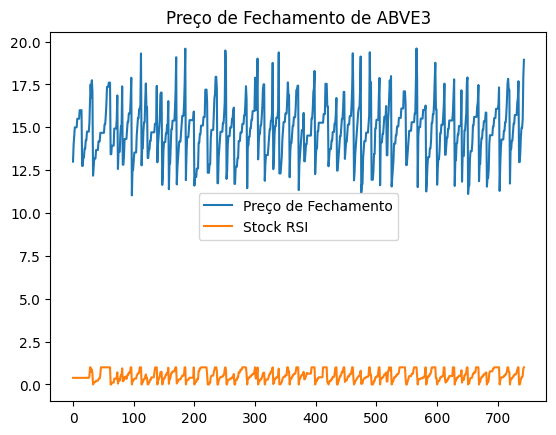

In [32]:
import matplotlib.pyplot as plt

# plotando o preco de fechamento e o indicador STOCKRSI
plt.plot(df['close'], label='Preço de Fechamento')
plt.plot(df['stoch_rsi'], label='Stock RSI')
plt.title(f'Preço de Fechamento de {papel}')
plt.legend()
plt.show()

In [34]:
x_data = df
x_data.fillna(method='ffill', inplace=True)
x_data.fillna(method='bfill', inplace=True)
print(x_data.head())

   index        date   open   high  ...  macd_diff        obv  roc  stoch_rsi
0      0  2023-02-14  13.15  13.36  ...   0.000000   29701200  0.0   0.387172
1      1  2020-07-13  14.91  14.95  ...   0.007111   66673800  0.0   0.387172
2      2  2020-02-27  14.90  14.97  ...   0.021330  157782000  0.0   0.387172
3      3  2021-04-01  15.39  15.40  ...   0.041997  173756100  0.0   0.387172
4      4  2021-10-22  14.83  15.23  ...   0.064517  203355200  0.0   0.387172

[5 rows x 20 columns]


In [41]:
# predicao usando SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [44]:
print(df.columns)

Index(['index', 'date', 'open', 'high', 'low', 'volume', 'adj_close', 'close',
       'ema_close', 'ema_open', 'ema_high', 'ema_low', 'rsi', 'willr', 'macd',
       'macd_signal', 'macd_diff', 'obv', 'roc', 'stoch_rsi'],
      dtype='object')


In [57]:
import datetime as dt
import time

# function to transform data into float number
def convert_to_time_stamp(date: str) -> float:
    '''
        receive a string date and return a timestamp date
        params: date: str
        return: ts: float
    '''
    d = dt.datetime.strptime(date, '%Y-%m-%d')
    ts = time.mktime(d.timetuple())
    return ts

In [59]:
# pega todas as colunas exceto a coluna que queremos prever 'close'
X = df.iloc[:, df.columns != 'close']

# convert a coluna data para ser usada dentro do StandarScaler
X['date'] = X['date'].apply(convert_to_time_stamp)
print(X.columns)
print(X)

Index(['index', 'date', 'open', 'high', 'low', 'volume', 'adj_close',
       'ema_close', 'ema_open', 'ema_high', 'ema_low', 'rsi', 'willr', 'macd',
       'macd_signal', 'macd_diff', 'obv', 'roc', 'stoch_rsi'],
      dtype='object')
     index          date   open  ...          obv        roc  stoch_rsi
0        0  1.676344e+09  13.15  ...     29701200   0.000000   0.387172
1        1  1.594609e+09  14.91  ...     66673800   0.000000   0.387172
2        2  1.582772e+09  14.90  ...    157782000   0.000000   0.387172
3        3  1.617246e+09  15.39  ...    173756100   0.000000   0.387172
4        4  1.634872e+09  14.83  ...    203355200   0.000000   0.387172
..     ...           ...    ...  ...          ...        ...        ...
739    739  1.607310e+09  14.92  ...  16479999800   1.698370   0.413731
740    740  1.643598e+09  14.90  ...  16501317800  -1.642576   0.413731
741    741  1.663556e+09  15.30  ...  16515571500   1.642576   0.515514
742    742  1.625454e+09  17.42  ...  16534383

C:\Users\leleu\AppData\Local\Temp\ipykernel_25740\1652970755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = X['date'].apply(convert_to_time_stamp)


In [60]:
# pega a coluna de fechamento para usarmos na predicao
y = df.iloc[:, 7]
print(y)


0      13.000000
1      14.000000
2      14.500000
3      15.000000
4      15.000000
         ...    
739    14.970000
740    14.970000
741    15.470000
742    17.940001
743    18.940001
Name: close, Length: 744, dtype: float64


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [62]:
print(X_train)

     index          date   open  ...          obv        roc  stoch_rsi
658    658  1.592795e+09  13.70  ...  14638714800   5.851461   0.462602
566    566  1.623035e+09  19.32  ...  12862648300  42.028986   1.000000
294    294  1.617851e+09  15.20  ...   6869240000   1.644737   0.547702
77      77  1.603336e+09  13.41  ...   1960862600   1.042438   0.220817
352    352  1.639019e+09  16.10  ...   8204402400  -1.923079   0.535741
..     ...           ...    ...  ...          ...        ...        ...
707    707  1.644203e+09  14.43  ...  15825291400  -4.986702   0.418507
192    192  1.608520e+09  15.65  ...   4513647600   5.112474   0.394601
629    629  1.583982e+09  12.48  ...  14084611300 -16.690646   0.000000
559    559  1.616036e+09  15.25  ...  12719600800 -10.526317   0.624506
684    684  1.599793e+09  12.37  ...  15211710900  -6.376359   0.135179

[558 rows x 19 columns]


### Feature Scaling

In [63]:
sc = StandardScaler()


X_train
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)

[[ 1.3614103  -1.38523575 -0.75008963 ...  1.3203941   0.31694153
  -0.17814557]
 [ 0.93095903 -0.25910283  2.79176312 ...  0.94382008  2.64954451
   1.56399354]
 [-0.3416795  -0.45215419  0.19524475 ... -0.3269442   0.04570637
   0.09773166]
 ...
 [ 1.22572457 -1.71342305 -1.51896176 ...  1.20290921 -1.13649633
  -1.67780822]
 [ 0.89820731 -0.51972216  0.22675602 ...  0.91349015 -0.73904149
   0.3467175 ]
 [ 1.48305957 -1.12461641 -1.58828607 ...  1.44188473 -0.4714664
  -1.23958556]]


In [64]:
print(X_test)

[[ 1.48773839 -1.06348348 -1.53786828 ...  1.44693475 -0.22077986
  -0.77695615]
 [ 0.68298167 -0.41354392  0.4914497  ...  0.72002982  0.23312719
   0.22906531]
 [-1.65174857  1.50409957  0.78135166 ... -1.68582904  1.42758036
  -0.42267298]
 ...
 [ 1.04792949 -0.8382569   0.08180504 ...  1.02513637 -0.3662221
   1.54019608]
 [ 0.08409295  0.85737752 -0.4034669  ...  0.11090363 -1.32175837
   0.45727188]
 [-1.55349339 -1.24366475 -0.81311156 ... -1.5961808  -0.5444804
  -1.22055798]]


### Treinando o modelo SVM no dataset de treinamento

In [66]:
classifier = SVC(kernel='rbf', C=100, probability=True)
classifier.fit(X_train, X_test)


ValueError: y should be a 1d array, got an array of shape (186, 19) instead.